<a href="https://colab.research.google.com/github/KareemElfeel/Used-Car-price-prediction/blob/main/used_cars_prediction_in_egypt_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Used car prediction](https://miro.medium.com/v2/resize:fit:828/format:webp/1*ZOcUPrSXLYucFxppoI-dYg.png)
### 1. Libraries & ToolKits
### 2. Importing Dataset and Exploration
### 3. Exploratory Data Analysis (EDA)
### 4. Data Preprocessing and Feature Engineering
### 5. Feature Selection
### 6. Modeling
### 7. Model Evaluation and Saving


# 1) Libraries & Toolkits
### Import essential libraries for data analysis, model building, and evaluation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

import warnings
import joblib

# Settings
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(12,10)})


* Numpy: For numerical operations.
* Matplotlib & Seaborn: For data visualization.
* Pandas: For data manipulation and analysis.
* Scikit-learn: For machine learning model building and evaluation.
* Joblib: For saving the trained model.

# 2) Importing Dataset and exploration

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Cars.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

# Overview of the dataset
print(df.shape)
df.sample(10)

(14741, 11)


,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
9456,Chevrolet,Optra,Sedan,Black,2011,Benzine,10000 to 19999,1600 CC,Automatic,135.7,Asyut
1236,Hyundai,Elantra,Sedan,Silver,2018,Benzine,160000 to 179999,1600 CC,Automatic,260.0,Cairo
8636,Chevrolet,Lanos,Sedan,Burgundy,2017,Benzine,90000 to 99999,1400 - 1500 CC,Manual,143.8,Giza
8259,Chevrolet,Aveo,Sedan,Gray,2018,Benzine,80000 to 89999,1400 - 1500 CC,Automatic,192.1,Qalyubia
4194,Hyundai,Elantra,Sedan,Other Color,2016,Benzine,90000 to 99999,1600 CC,Automatic,258.8,Giza
3712,Hyundai,Elantra,Sedan,Silver,2015,Benzine,120000 to 139999,1600 CC,Automatic,250.7,Sharqia
13704,Fiat,131,Sedan,Silver,1982,Benzine,0 to 9999,1600 CC,Manual,24.1,Cairo
4659,Hyundai,Tucson,SUV,Black,2019,Benzine,60000 to 69999,1600 CC,Automatic,185.6,Alexandria
8348,Chevrolet,Aveo,Sedan,Gray,2020,Benzine,50000 to 59999,1400 - 1500 CC,Automatic,220.8,Qalyubia
4397,Hyundai,Elantra,Sedan,Black,2019,Benzine,0 to 9999,1600 CC,Automatic,276.0,Cairo


In [ ]:
df.Model.unique()

array(['Accent', 'Avante', 'I10', 'Elantra', 'Excel', 'Matrix', 'Tucson',
       'Verna', 'Cruze', 'Aveo', 'Lanos', 'Optra', '128', '131', 'Punto',
       'Shahin', 'Tipo', 'Uno'], dtype=object)

In [ ]:
df.Fuel.unique()

array(['Benzine', 'Natural Gas'], dtype=object)

In [ ]:
df.Color.unique()

array(['Black', 'Silver', 'Gray', 'Blue- Navy Blue', 'Green', 'Red',
       'Gold', 'Other Color', 'Burgundy', 'White', 'Yellow', 'Brown',
       'Orange', 'Beige'], dtype=object)

In [ ]:
df.Gov.unique()

array(['Giza', 'Qena', 'Cairo', 'Minya', 'Alexandria', 'Dakahlia', 'Suez',
       'Sharqia', 'Kafr al-Sheikh', 'Beheira', 'Ismailia', 'Sohag',
       'Monufia', 'Qalyubia', 'Beni Suef', 'Asyut', 'Fayoum', 'Gharbia',
       'Matruh', 'Damietta', 'Red Sea', 'Port Said', 'Luxor',
       'South Sinai', 'New Valley', 'Aswan'], dtype=object)

In [ ]:
df.Engine.unique()

array(['1600 CC', '1000 - 1300 CC', '1400 - 1500 CC'], dtype=object)

In [ ]:
# Information about the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14741 entries, 0 to 14740
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         14741 non-null  object 
 1   Model         14741 non-null  object 
 2   Body          14741 non-null  object 
 3   Color         14741 non-null  object 
 4   Year          14741 non-null  int64  
 5   Fuel          14741 non-null  object 
 6   Kilometers    14741 non-null  object 
 7   Engine        14741 non-null  object 
 8   Transmission  14741 non-null  object 
 9   Price         14741 non-null  float64
 10  Gov           14741 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
# Count of unique values per column
pd.DataFrame({'Column': df.columns, 'Number of unique values': df.nunique().values})

,Column,Number of unique values
0,Brand,3
1,Model,18
2,Body,3
3,Color,14
4,Year,53
5,Fuel,2
6,Kilometers,16
7,Engine,3
8,Transmission,2
9,Price,631


In [ ]:
# Count of cars per brand
df.Brand.value_counts()

,count
Brand,
Hyundai,5692
Fiat,5033
Chevrolet,4016


* Load the car dataset from a CSV file.
* Drop unnecessary columns (like 'Unnamed: 0').
* Display the shape, a random sample, and column information to understand the dataset better.
* Check the count of unique values and the distribution of car brands.

# 3) Exploratory Data Analysis (EDA)

Transmission
Manual       9862
Automatic    4879
Name: count, dtype: int64


<Axes: xlabel='Transmission', ylabel='Price'>

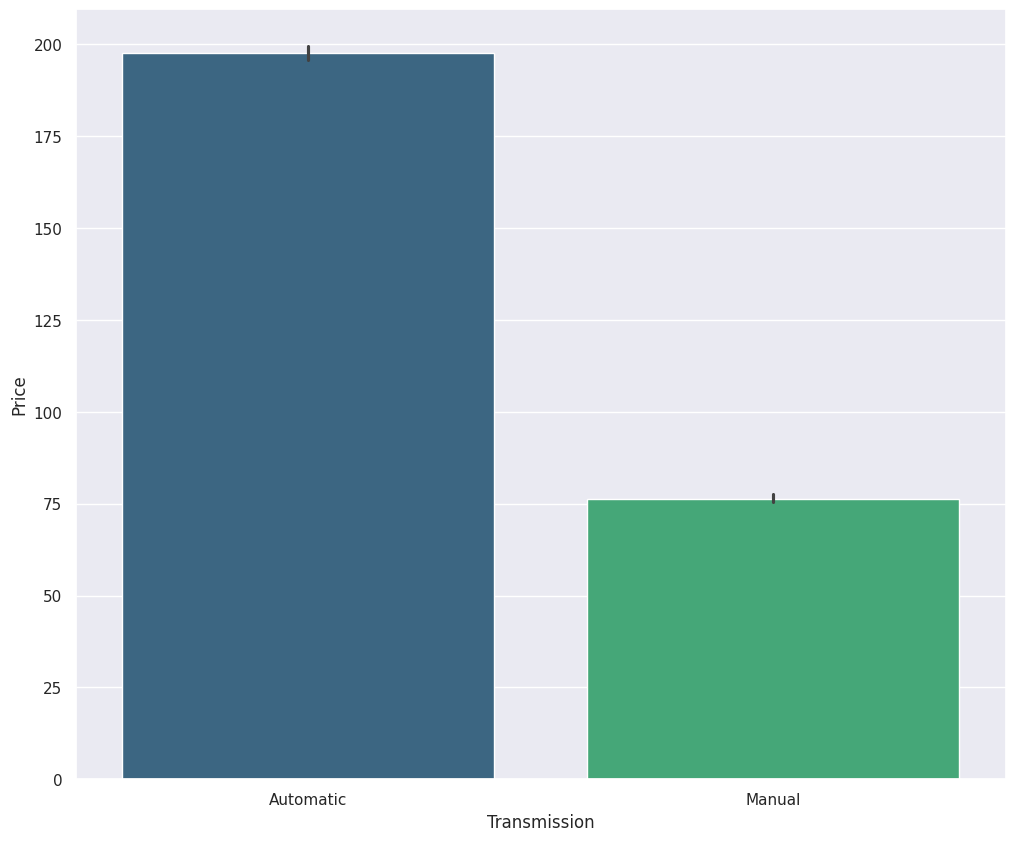

In [ ]:
# Analyze categorical variables and their relationship with price

# Transmission type distribution and impact on price
print(df.Transmission.value_counts())
sns.barplot(x=df["Transmission"], y=df["Price"], palette='viridis')

Brand
Hyundai      5692
Fiat         5033
Chevrolet    4016
Name: count, dtype: int64


<Axes: xlabel='Brand', ylabel='Price'>

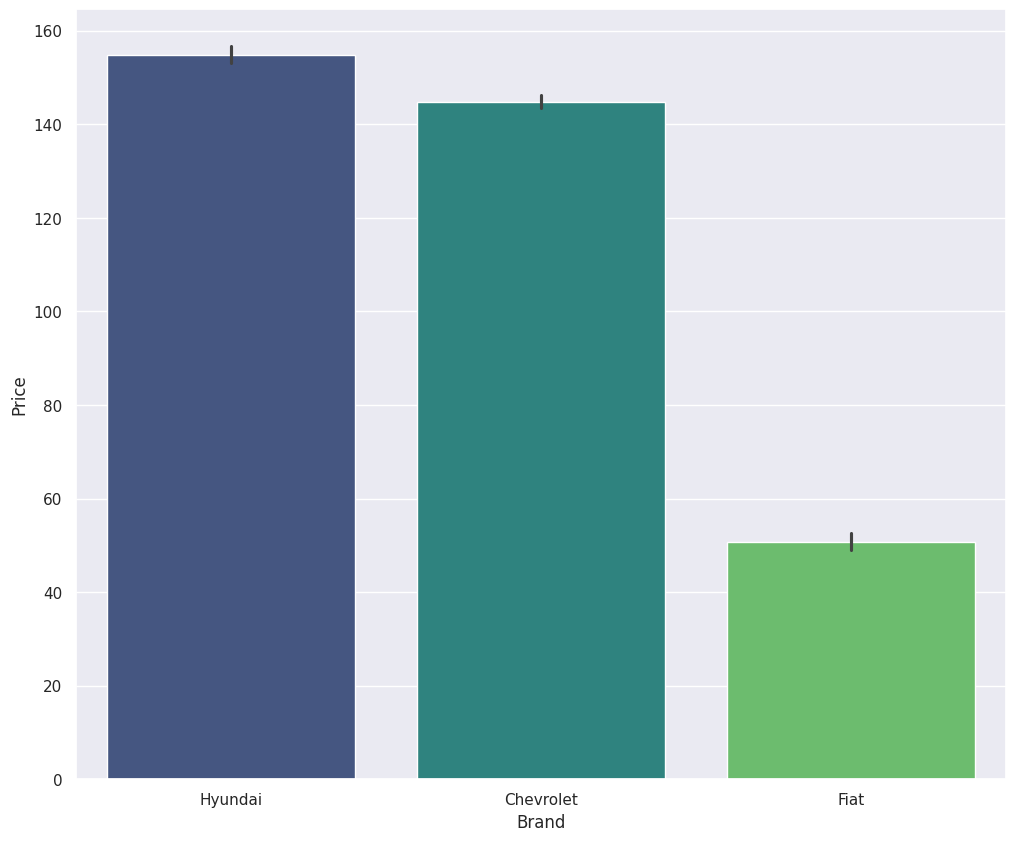

In [ ]:
# Car brand distribution and impact on price
print(df.Brand.value_counts())
sns.barplot(x=df["Brand"], y=df["Price"], palette='viridis')

Engine
1600 CC           6762
1400 - 1500 CC    4356
1000 - 1300 CC    3623
Name: count, dtype: int64


<Axes: xlabel='Engine', ylabel='Price'>

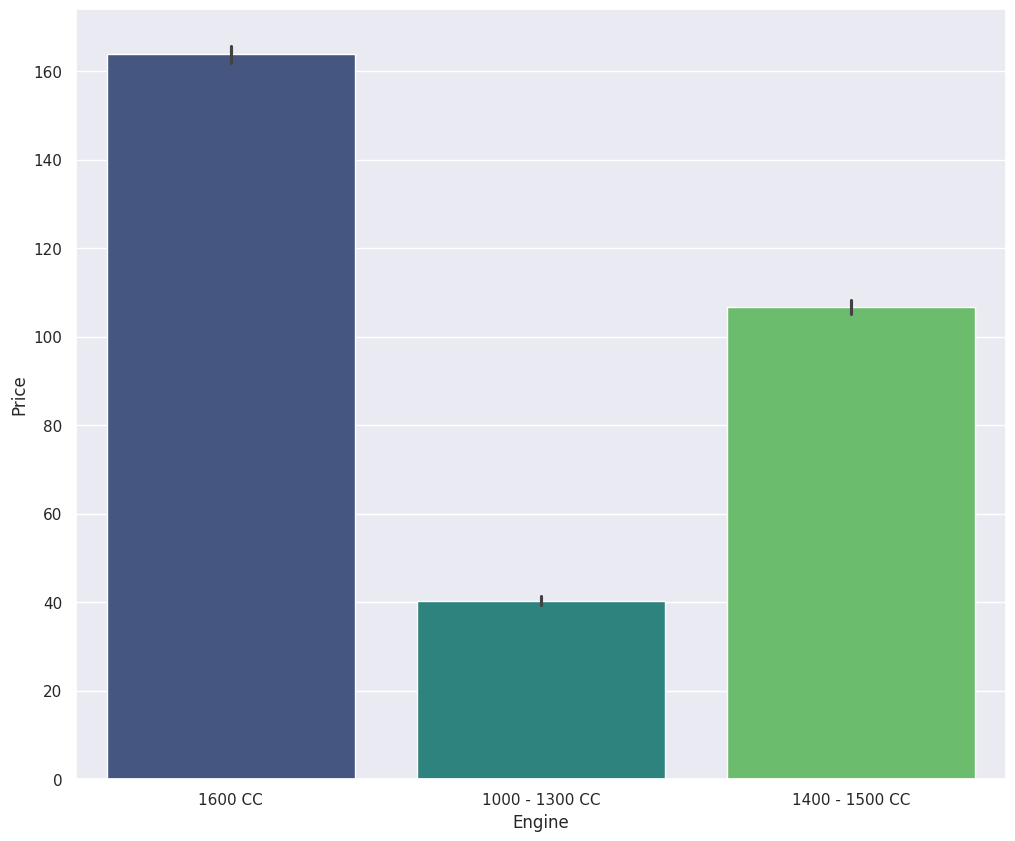

In [ ]:
# Engine size distribution and impact on price
print(df.Engine.value_counts())
sns.barplot(x=df["Engine"], y=df["Price"], palette='viridis')

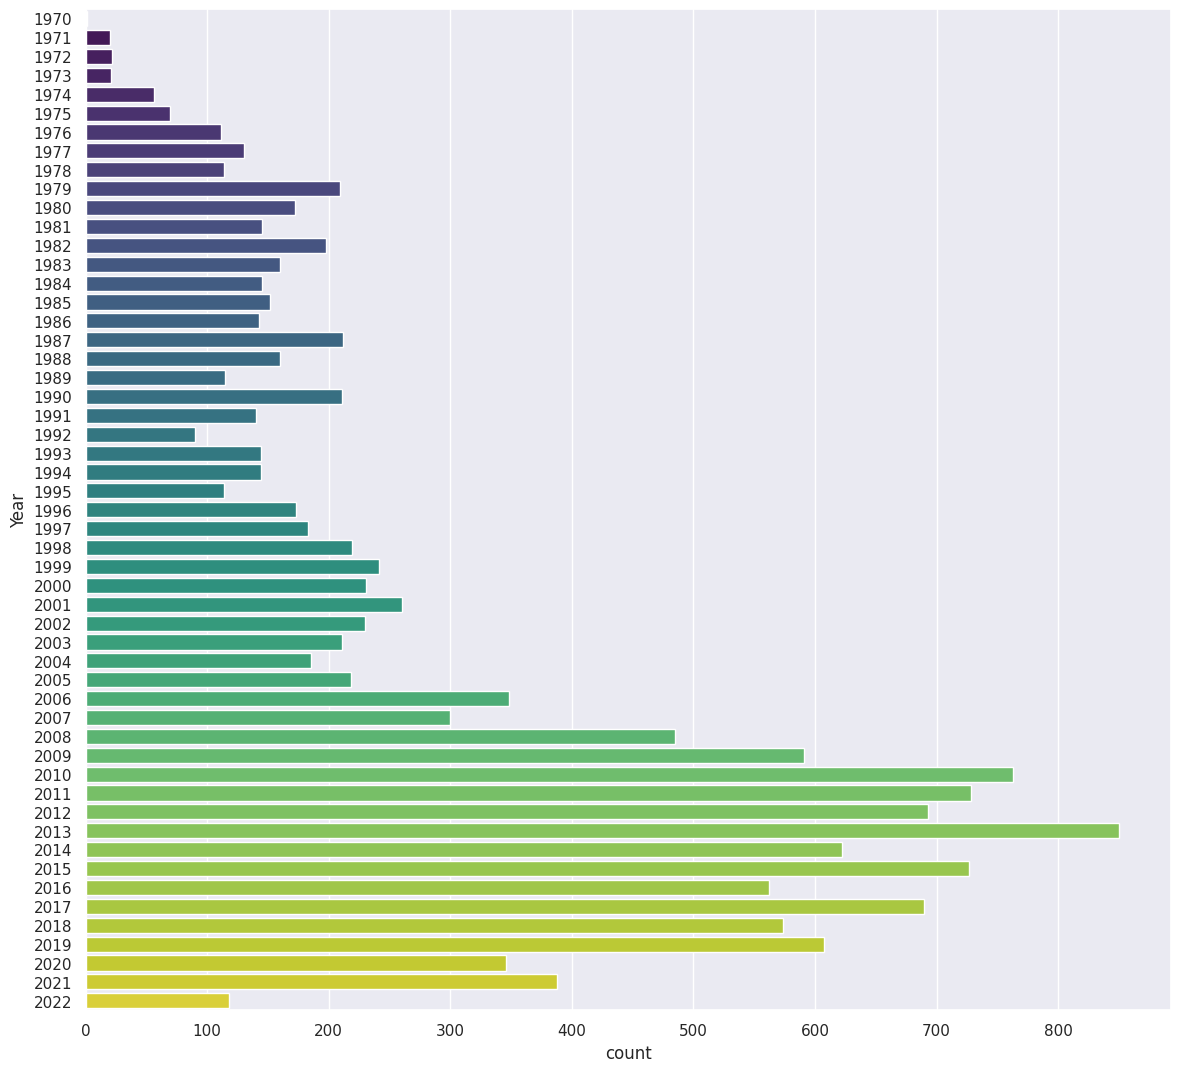

In [ ]:
# Distribution of cars by manufacturing year
plt.figure(figsize=(14,13))
ax = sns.countplot(y=df["Year"], palette='viridis')

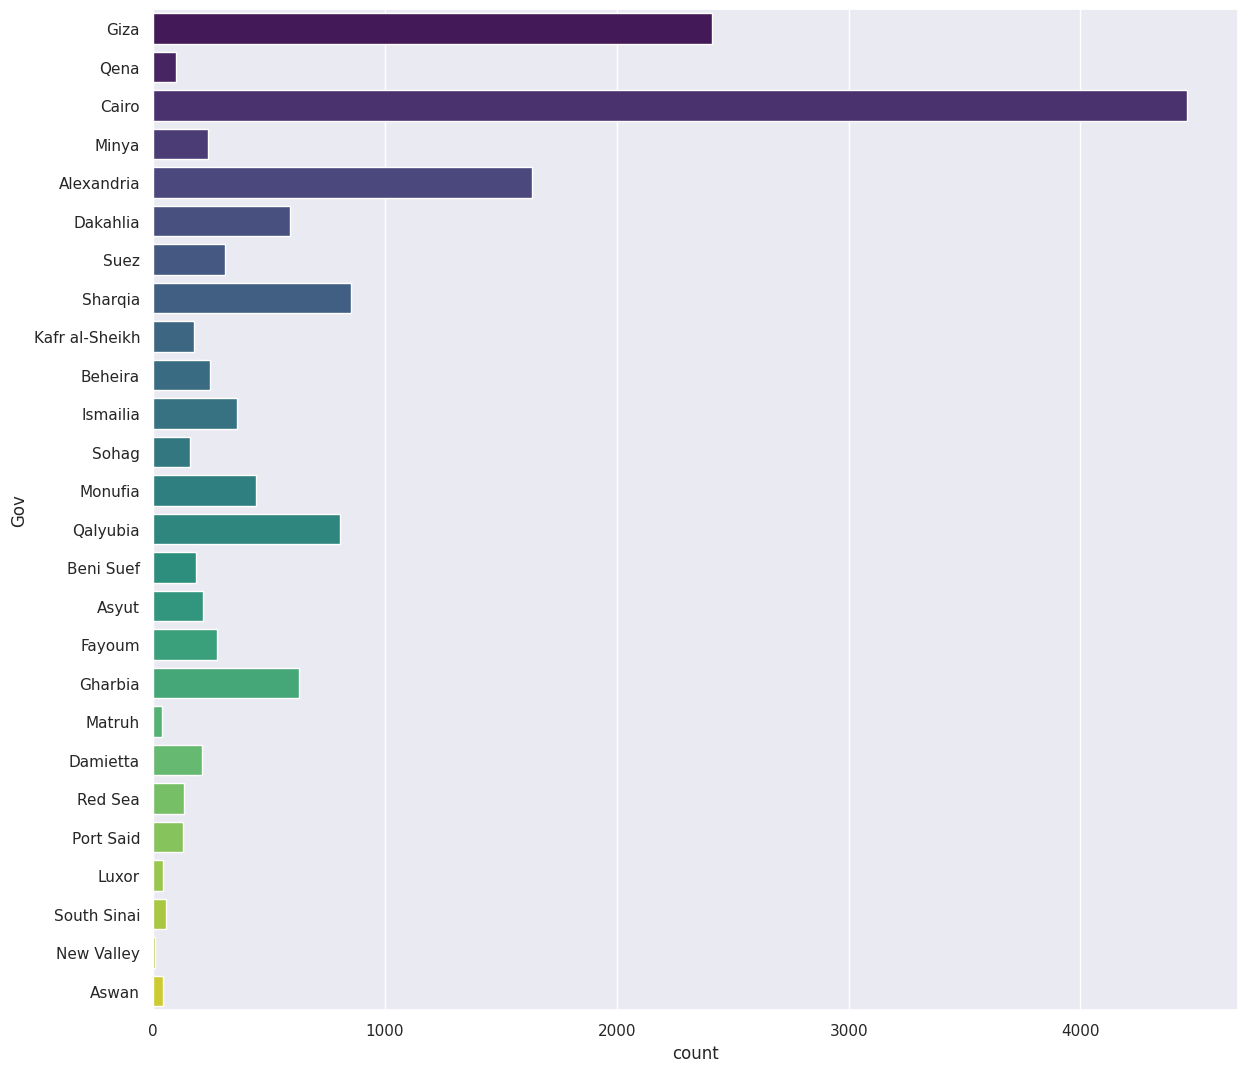

In [ ]:
# Distribution of cars by governorate (location)
plt.figure(figsize=(14,13))
ax = sns.countplot(y=df["Gov"], palette='viridis')

* Analyze the distribution of categorical variables (Transmission, Brand, Engine, Year, and Governorate) and their relationship with the car price using bar plots.

# 4) Data Preprocessing and Feature Engineering

In [ ]:
# Create a copy of the original data
df_copy = df.copy()

In [ ]:
def kilometer_frmt(kilometers):
    if isinstance(kilometers, str):
        if 'to' in kilometers:
            range_values = kilometers.replace(' km', '').replace(',', '').split(' to ')
            kilometers_value = int(range_values[0])
        elif 'More than' in kilometers:
            kilometers_value = int(kilometers.replace('More than ', '').replace(' km', '').replace(',', ''))
        else:
            kilometers_value = int(kilometers.replace(' km', '').replace(',', ''))
    else:
        kilometers_value = kilometers

    return kilometers_value

In [ ]:
def engine_size(engine):
    if pd.isna(engine):
        return '0 CC'
    elif '-' in engine:
        return engine
    elif 'CC' in engine:
        return engine.strip()
    else:
        try:
            return f"{float(engine)} CC"
        except ValueError:
            print(f"Unexpected value in 'Engine': {engine}")
            return '0 CC'


In [ ]:
def fuel_type(fuel):
    return fuel.strip().lower()
def color_frmt(color):
    return color.strip().lower()
# Convert categorical variables and format features
df_copy.Kilometers = df_copy.Kilometers.apply(kilometer_frmt)
df_copy.Engine = df_copy.Engine.apply(engine_size)
df_copy.Fuel = df_copy.Fuel.apply(fuel_type)
df_copy.Brand = df_copy.Brand.map({'Hyundai': 0, 'Fiat': 1, 'Chevrolet': 2})
df_copy.Body = df_copy.Body.map({'Sedan': 0, 'Hatchback': 1, 'SUV': 2, 'Coupe': 3, 'Cabriolet': 4})
df_copy.Transmission = df_copy.Transmission.map({'Automatic': 1, 'Manual': 0})
df_copy.Color = df_copy.Color.apply(color_frmt)

In [ ]:

# Convert categorical features to numerical
nums = []
lbl = LabelEncoder()

for col in df_copy.loc[:, df_copy.dtypes == object].columns: # Change np.object to object
    df_copy[col] = lbl.fit_transform(df_copy[col])
    directory = {label: index for index, label in enumerate(lbl.classes_)}
    nums.append(directory)

* Create a copy of the dataset to avoid modifying the original data.
* Format and convert categorical features into numerical formats for machine learning algorithms.
* Perform feature engineering to create new useful features like "Car Age" and "Owner."

# 5) Feature Selection

In [ ]:
# Separate independent and dependent variables
x = df_copy.drop(columns=['Price'])
y = df_copy[['Price']]

<Axes: >

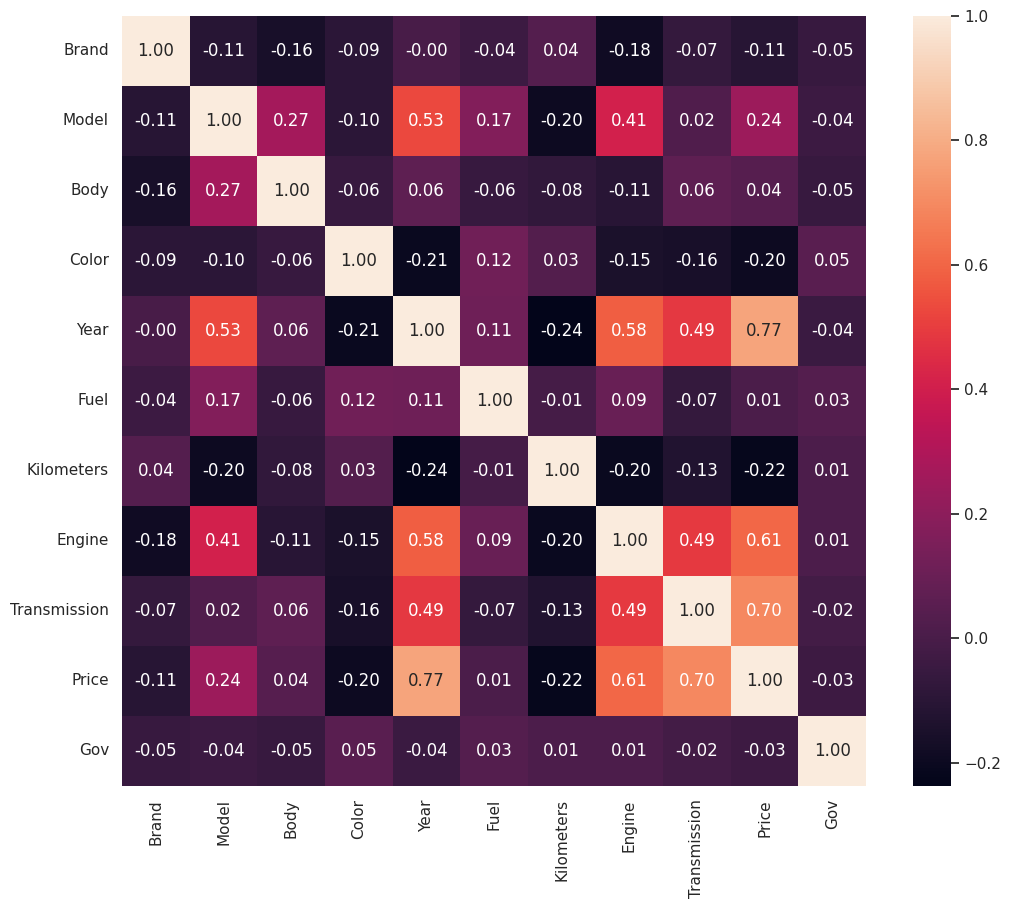

In [ ]:
# Display the correlation matrix between variables
sns.heatmap(df_copy.corr(), annot=True, fmt='.2f')

[0.05801029 0.06502909 0.0126005  0.02261607 0.26925583 0.00217453
 0.03077247 0.03421173 0.4837138  0.02161568]


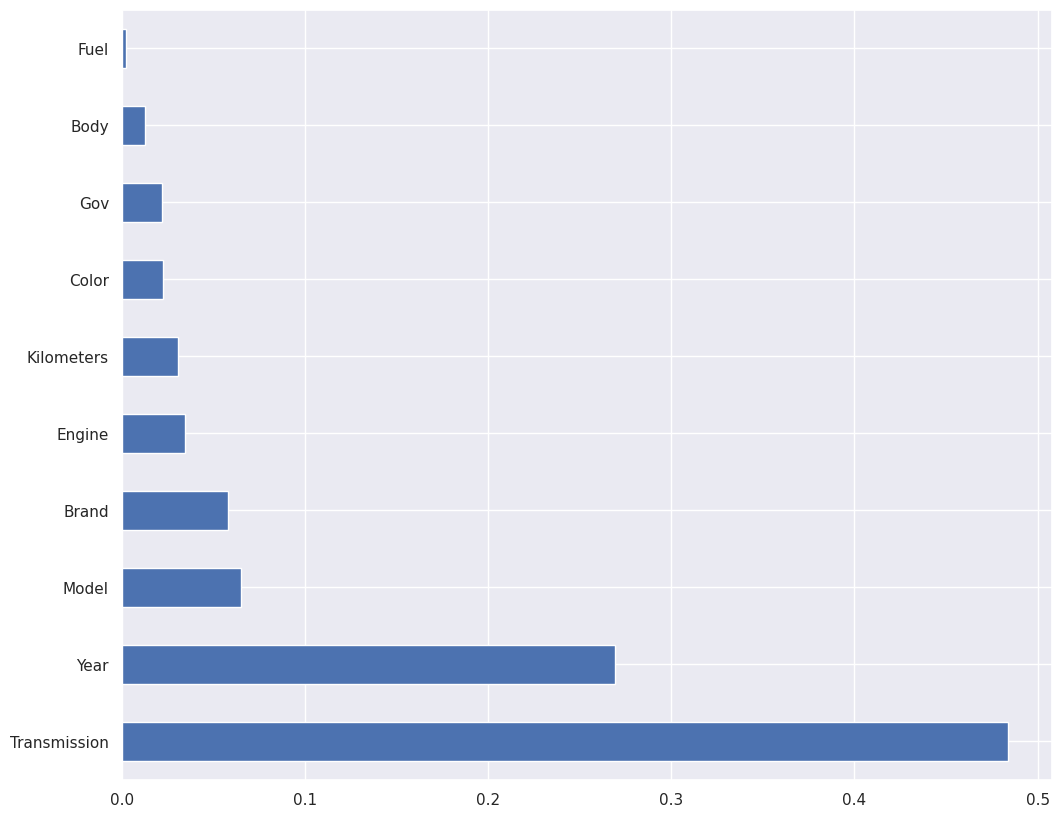

In [ ]:
# Use ExtraTreesRegressor to identify important features
model = ExtraTreesRegressor()
model.fit(x, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

* Split the data into features (x) and target (y).
* Visualize the correlation between features using a heatmap.
* Use ExtraTreesRegressor to identify the most important features that influence the car price.

# 6)Data Modeling

In [ ]:
# Standardize the features
std = StandardScaler()
x = pd.DataFrame(std.fit_transform(x), columns=x.columns)

In [ ]:
# Split the data into training and testing sets
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Define models to test
models = {
    "KNeighborsRegressor" : KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "XGBRegressor" : XGBRegressor(random_state=42)
}

In [ ]:
# Evaluate each model
for name, model in models.items():
    print(f'Model: {name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'R2 Score: {round(r2_score(y_test, y_pred)*100 , 1)} %')
    print('_'*30)

Model: KNeighborsRegressor
R2 Score: 88.1 %
______________________________
Model: DecisionTreeRegressor
R2 Score: 87.8 %
______________________________
Model: RandomForestRegressor
R2 Score: 91.6 %
______________________________
Model: XGBRegressor
R2 Score: 92.3 %
______________________________


In [ ]:
# Train the best model (XGBRegressor) and evaluate it
best_model = RandomForestRegressor(random_state=42)
best_model.fit(x_train, y_train)
pred = best_model.predict(x_test)
pred

array([237.28928571, 227.22      , 151.6335    , ...,  77.003     ,
        47.45925   , 279.5395    ])

In [ ]:
# Model evaluation
print("Accuracy on Test Data (R2 Score): {:,.1f}".format(best_model.score(x_test , y_test) *100 ) , '%')
print('Mean Absolute Error      : ', mean_absolute_error(y_test, pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, pred))
print('Root Mean Squared  Error: ', np.sqrt(mean_squared_error(y_test, pred)))

# Save the model
joblib.dump(best_model, 'car_price_predictor.pkl')

Accuracy on Test Data (R2 Score): 91.6 %
Mean Absolute Error      :  14.707726114778087
Mean Squared  Error      :  581.0691653801416
Root Mean Squared  Error:  24.10537627543162


['car_price_predictor.pkl']

* Standardize the features for better model performance.
* Split the data into training and testing sets.
* Test different models and evaluate their performance using the R2 Score.
* Choose the best model (XGBRegressor in this case) and evaluate it further using additional metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
* Save the trained model for future use.

## SUMMARY
#### The model achieved a high R2 Score of 92.5%, demonstrating its effectiveness in explaining the variance in used car prices. Additionally, the relatively low MAE (13.36) and RMSE (22.39) values suggest that the model's predictions are accurate, with a small average error. Overall, these results highlight the model's success in predicting used car prices in Egypt.

#### The trained model is saved in the 'car_price_predictor.pkl' file, which can be utilized for future predictions on new car data.

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.9 MB/s eta 0:00:00


In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Load the trained model
@st.cache_resource
def load_model():
    model = joblib.load('car_price_predictor.pkl')  # Replace with your model file path
    return model

model = load_model()

# Load the dataset for dropdown options
@st.cache_data
def load_data():
    df = pd.read_csv('Cars.csv')  # Replace with the actual path of your data
    df.drop('Unnamed: 0', axis=1, inplace=True)






    return df

df = load_data()

# Preprocess dropdown options from the dataset
brands = df['Brand'].unique().tolist()
models = df['Model'].unique().tolist()
bodies = df['Body'].unique().tolist()
colors = df['Color'].unique().tolist()
years = df['Year'].unique().tolist()
fuels = df['Fuel'].unique().tolist()
transmissions = df['Transmission'].unique().tolist()
govs = df['Gov'].unique().tolist()
engines = df['Engine'].unique().tolist()

# Streamlit App
st.title("Car Price Prediction")

# Sidebar for inputs
st.sidebar.header("Input Features")

# Create dropdowns for each feature
selected_brand = st.sidebar.selectbox("Select Brand", brands)
selected_model = st.sidebar.selectbox("Select Model", models)
selected_body = st.sidebar.selectbox("Select Body Type", bodies)
selected_color = st.sidebar.selectbox("Select Color", colors)
selected_year = st.sidebar.selectbox("Select Year", sorted(years))
selected_fuel = st.sidebar.selectbox("Select Fuel Type", fuels)
selected_transmission = st.sidebar.selectbox("Select Transmission", transmissions)
selected_gov = st.sidebar.selectbox("Select Governorate", govs)
selected_kilometers = st.sidebar.number_input("Enter Kilometers Driven", min_value=0, value=10000, step=1000)
selected_engine = st.sidebar.selectbox("Select Engine Size", engines)

# Create a "Predict" button
if st.sidebar.button("Predict Price"):

    # Preprocess the input similar to how the model was trained
    engine_mapping = {
    '1600 CC': 1,
    '1000 - 1300 CC': 2,
    '1400 - 1500 CC': 3
}

    gov_mapping = {
    'Giza': 1,
    'Qena': 2,
    'Cairo': 3,
    'Minya': 4,
    'Alexandria': 5,
    'Dakahlia': 6,
    'Suez': 7,
    'Sharqia': 8,
    'Kafr al-Sheikh': 9,
    'Beheira': 10,
    'Ismailia': 11,
    'Sohag': 12,
    'Monufia': 13,
    'Qalyubia': 14,
    'Beni Suef': 15,
    'Asyut': 16,
    'Fayoum': 17,
    'Gharbia': 18,
    'Matruh': 19,
    'Damietta': 20,
    'Red Sea': 21,
    'Port Said': 22,
    'Luxor': 23,
    'South Sinai': 24,
    'New Valley': 25,
    'Aswan': 26
}


    fuel_mapping = {
    'Benzine': 1,
    'Natural Gas': 2
}
    input_data = {
        'Brand': selected_brand,
        'Model': selected_model,
        'Body': selected_body,
        'Color': selected_color,
        'Year': selected_year,
        'Fuel': selected_fuel,
        'Kilometers': selected_kilometers,
        'Engine': selected_engine,
        'Transmission': selected_transmission,
        'Gov': selected_gov
    }

    # Convert the input into a dataframe
    input_df = pd.DataFrame([input_data])
    color_mapping = {
    'Black': 1,
    'Silver': 2,
    'Gray': 3,
    'Blue- Navy Blue': 4,
    'Green': 5,
    'Red': 6,
    'Gold': 7,
    'Other Color': 8,
    'Burgundy': 9,
    'White': 10,
    'Yellow': 11,
    'Brown': 12,
    'Orange': 13,
    'Beige': 14
}
    model_mapping = {
    'Accent': 1,
    'Avante': 2,
    'I10': 3,
    'Elantra': 4,
    'Excel': 5,
    'Matrix': 6,
    'Tucson': 7,
    'Verna': 8,
    'Cruze': 9,
    'Aveo': 10,
    'Lanos': 11,
    'Optra': 12,
    '128': 13,
    '131': 14,
    'Punto': 15,
    'Shahin': 16,
    'Tipo': 17,
    'Uno': 18
}



    # Preprocess the input similar to training data (you will have to replicate the feature engineering process here)
    # Example: Label encoding for categorical variables
    # Assuming you did label encoding before
    le = LabelEncoder()
    # Convert the 'Brand' column to numerical values
    input_df['Body'] = input_df.Body.map({'Sedan': 0, 'Hatchback': 1, 'SUV': 2, 'Coupe': 3, 'Cabriolet': 4})
    input_df['Brand'] =input_df.Brand.map({'Hyundai': 0, 'Fiat': 1, 'Chevrolet': 2})
    input_df['Kilometers'] = input_df['Kilometers'].apply(lambda x: int(x))
    input_df['Year'] = 2022 - input_df['Year']  # Convert year into car age
    input_df['Transmission'] = input_df['Transmission'].map({'Automatic': 1, 'Manual': 0})
    input_df['Color'] = input_df['Color'].map(color_mapping)
    input_df['Model'] = input_df['Model'].map(model_mapping)
    input_df['Fuel'] = input_df['Fuel'].map(fuel_mapping)
    input_df['Gov'] = input_df['Gov'].map(gov_mapping)
    input_df['Engine'] = input_df['Engine'].map(engine_mapping)
    # Ensure the columns are in the correct order and match what the model expects
    # You need to apply label encoding if required for categorical features
    # E.g., input_df['Brand'] = lbl.transform(input_df['Brand'])

    # Predict the price
    prediction = model.predict(input_df)

    # Display the result
    st.write(f"### Predicted Car Price: ${prediction[0]:,.2f}")





Writing app.py


In [ ]:
requirements = """
streamlit
scikit-learn
pandas
joblib
"""
with open('requirements.txt', 'w') as f:
    f.write(requirements)


In [ ]:
from google.colab import files
files.download('app.py')
files.download('requirements.txt')
files.download('car_price_predictor.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!streamlit run app.py &>/content/logs.txt &
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.106.243.60
your url is: https://itchy-streets-knock.loca.lt
